# 국가통계포털 데이터셋 소개
- Kosis 홈페이지 - 국내통계 - 도소매서비스 - 온라인쇼핑동향조사 -[국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 ](http://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01#)


# 데이터셋 로드하기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

%matplotlib inline

In [2]:
df_raw = pd.read_csv("data\\국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200604170857.csv",encoding="cp949")

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국가(대륙)별      450 non-null    object
 1   상품군별         450 non-null    object
 2   판매유형별        450 non-null    object
 3   2014 1/4     450 non-null    object
 4   2014 2/4     450 non-null    object
 5   2014 3/4     450 non-null    object
 6   2014 4/4     450 non-null    object
 7   2015 1/4     450 non-null    object
 8   2015 2/4     450 non-null    object
 9   2015 3/4     450 non-null    object
 10  2015 4/4     450 non-null    object
 11  2016 1/4     450 non-null    object
 12  2016 2/4     450 non-null    object
 13  2016 3/4     450 non-null    object
 14  2016 4/4     450 non-null    object
 15  2017 1/4     450 non-null    int64 
 16  2017 2/4     450 non-null    int64 
 17  2017 3/4     450 non-null    int64 
 18  2017 4/4     450 non-null    int64 
 19  2018 1/4     450 non-null    

In [4]:
df_raw.shape

(450, 28)

In [5]:
df_raw["국가(대륙)별"].value_counts() 
# (45개씩)

대양주           45
일본            45
아세안(ASEAN)    45
기타            45
중남미           45
중국            45
미국            45
합계            45
중동            45
EU            45
Name: 국가(대륙)별, dtype: int64

In [6]:
len(df_raw["상품군별"].unique())

15

In [7]:
len(df_raw["판매유형별"].unique()) 
# 계, 면세점, 면세점 이외


3

데이터 형태 파악
행의 분류 기준 3가지
- 국가(대륙)별 (합계 포함 10가지)
- 상품군별 (합계 포함 15가지)
- 판매유형별 (3가지)

In [8]:
df_raw[df_raw["국가(대륙)별"]=="미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,53209,42679,40207,37631,48978,40918,44861,55386,53848,38489
46,미국,합계,면세점,-,-,-,-,-,-,-,...,12177,5184,3603,2317,2079,2657,2951,1818,1481,698
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,41032,37495,36604,35314,46899,38261,41910,53568,52367,37791
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,854,2033,1553,1784,1774,1298,1408,1653,1382,1191
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,1,0,0,0,0,0


# 데이터 전처리 - tidy data 만들기
- 칼럼을 행으로


In [9]:
df_raw.melt?

In [10]:
# id_vars를 설정하면 values_vars에 정보를 넣지 않아도 id_vars의 나머지를 빼서
# variable 칼럼에 제공한다.
df =df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],var_name="기간",value_name="백만원")
df.shape

(11250, 5)

In [12]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [13]:
df.info()
# object => int 전처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  11250 non-null  object
 1   상품군별     11250 non-null  object
 2   판매유형별    11250 non-null  object
 3   기간       11250 non-null  object
 4   백만원      11250 non-null  object
dtypes: object(5)
memory usage: 439.6+ KB


# 데이터 전처리 - 문자열 분리하고 데이터 타입 변경하기

In [14]:
# 연도 분리
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))

In [147]:
#분기 분리
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split('/')[0]))

In [16]:
df.head(1000)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1
...,...,...,...,...,...,...,...
995,중국,컴퓨터 및 주변기기,면세점 이외,2014 3/4,-,2014,3
996,중국,가전·전자·통신기기,계,2014 3/4,1342,2014,3
997,중국,가전·전자·통신기기,면세점,2014 3/4,-,2014,3
998,중국,가전·전자·통신기기,면세점 이외,2014 3/4,-,2014,3


In [17]:
# 대쉬(-)를 결측치로 변경 float 타입으로 변경하기

In [18]:
df["백만원"] = df["백만원"].replace("-",np.nan).astype(float)


In [19]:
# "국가(대륙)별"] != "합계") & (df["상품군별"] != "합계") 합계인 것은 보지 않고 싶다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9450 entries, 48 to 11249
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9450 non-null   object 
 1   상품군별     9450 non-null   object 
 2   판매유형별    9450 non-null   object 
 3   기간       9450 non-null   object 
 4   백만원      6426 non-null   float64
 5   연도       9450 non-null   int64  
 6   분기       9450 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.6+ KB


In [20]:
# 칼럼별 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# 전체 상품군별 데이터로 연도별 증가추세 시각화 하기

In [25]:
# 판매유형별 데이터는 일부기간에서는 계만 존재함.

df_total=df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


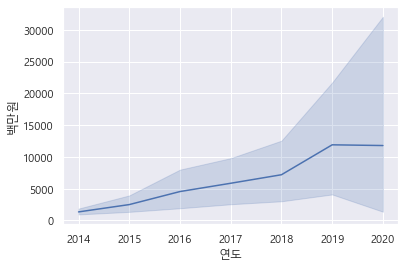

In [27]:

# 카테고리 데이터, 수치 데이터 => 평균과 신뢰구간 구하기 => line plot
sns.lineplot(data=df_total,x="연도",y="백만원")


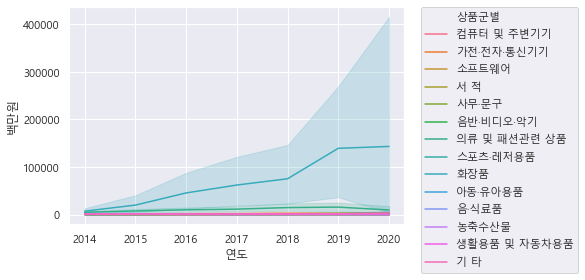

In [31]:
# 연도, 판매액 lineplot 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
# 문제 상품군별로 잘안보임

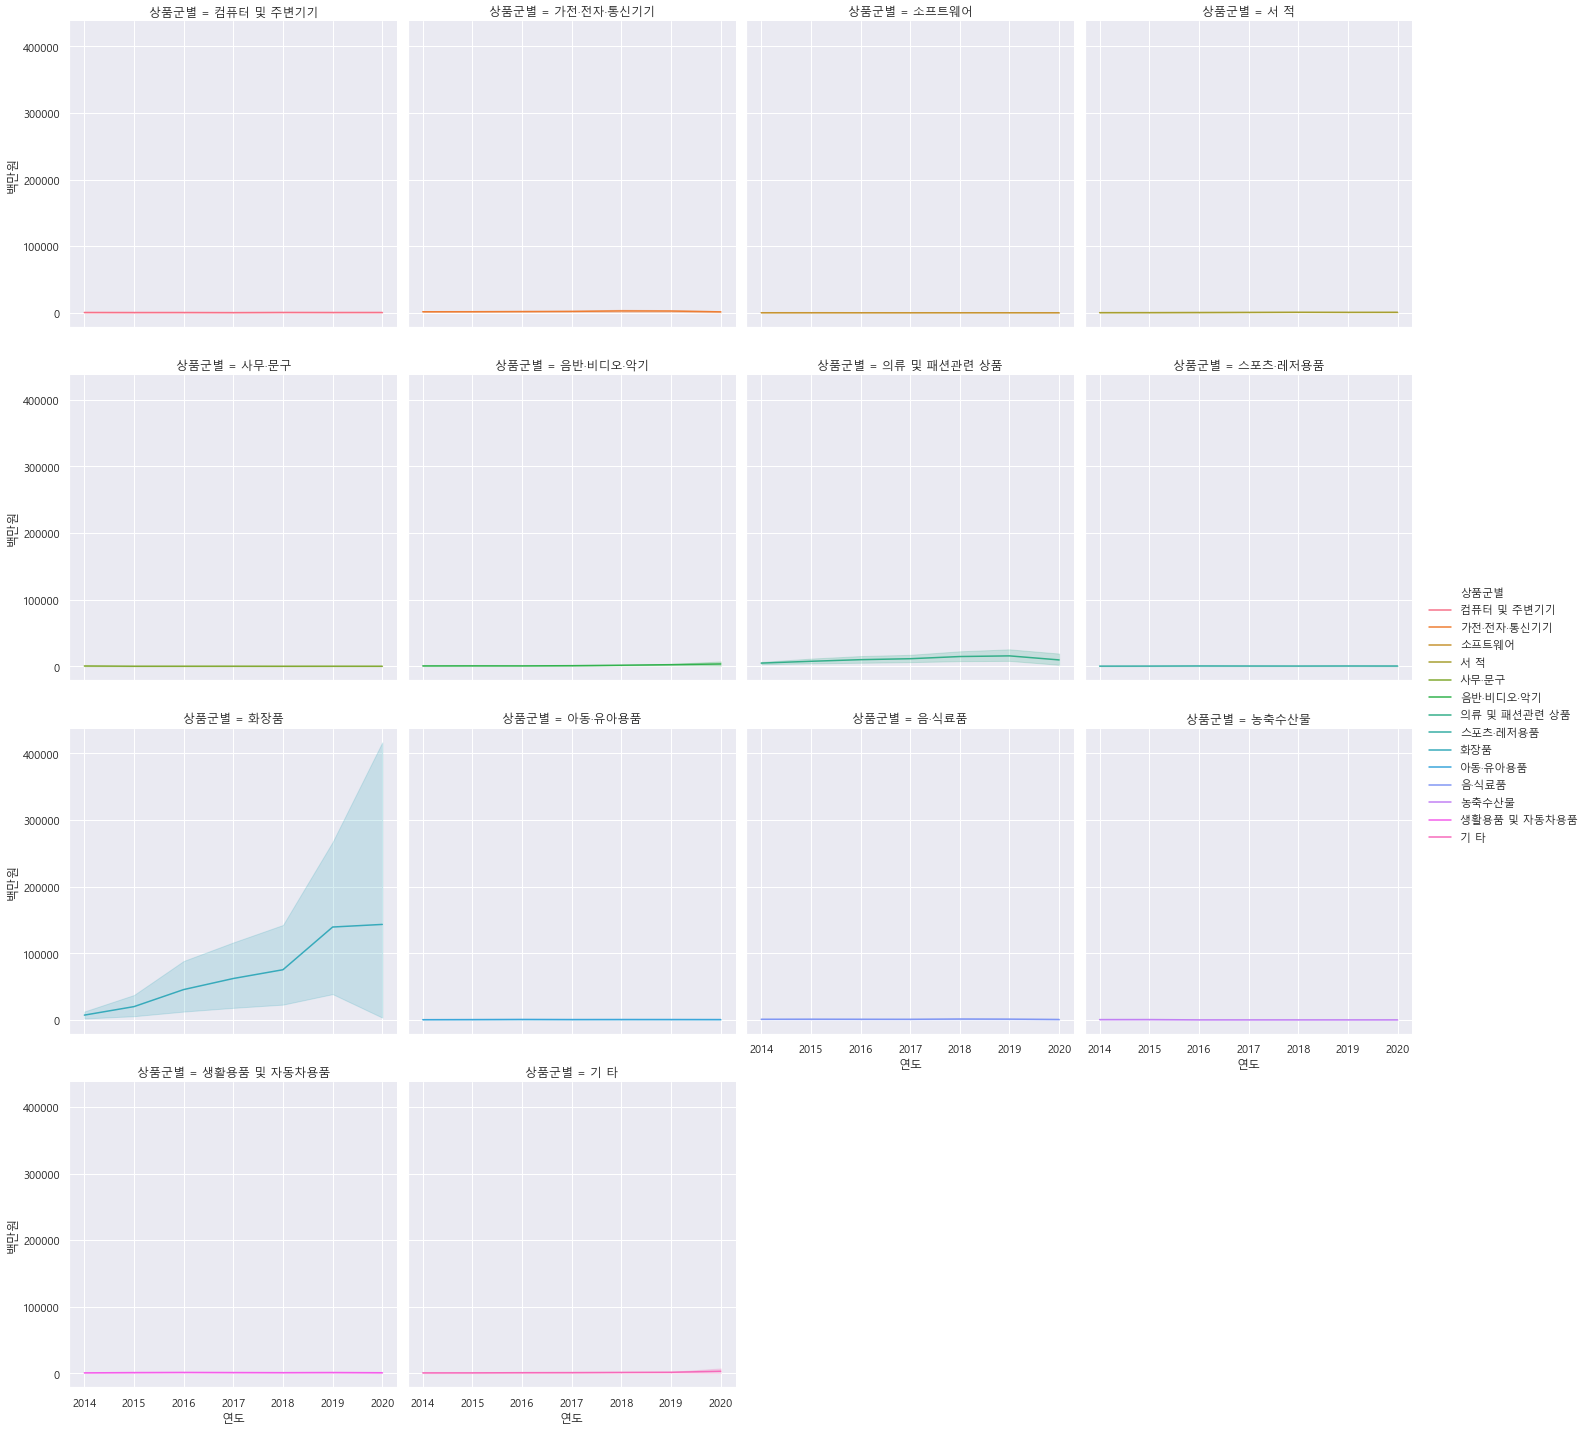

In [38]:
# relplot 상품군별: 다른 그래프에 그려보기, 하지만 y축 도메인이 가장 큰 값에 맞쳐있따.
# col: 상품군별로 보기, col_wrap : 서브플롯의 열을 4개로
sns.relplot(data=df_total,x="연도",y="백만원",hue="상품군별", kind="line", col="상품군별",col_wrap=4 )

In [56]:
# 화장품을 제외하고 df 만들기
# 내방법
df_sub = df_total[~(df_total["상품군별"] == "화장품")].copy()
# 선생님 방법
# df_total[~df_total["상품군별"].isin(["화장품"])].copy()


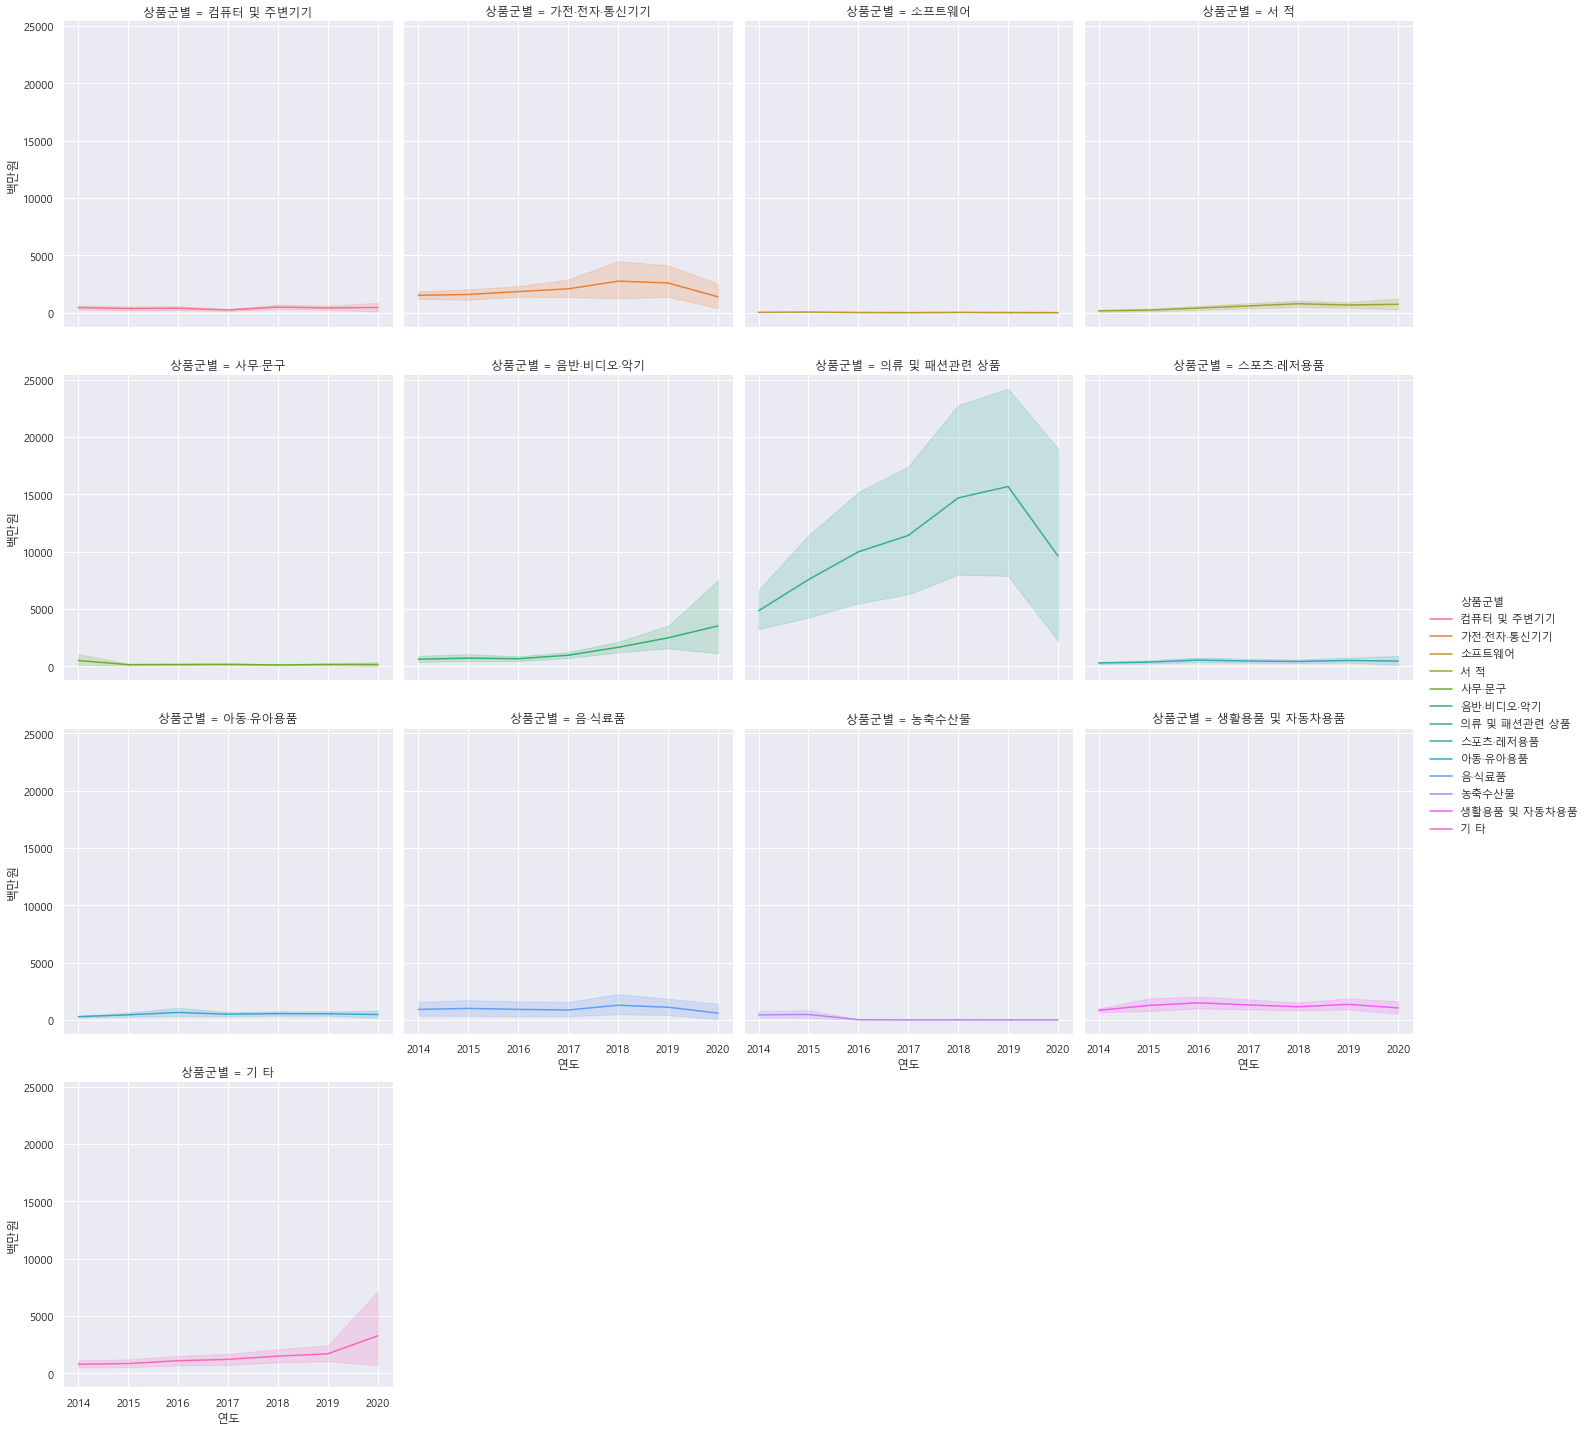

In [57]:
# 이방법말고 각 도메인의 분포에 맞춰 볼 순 없을까?
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별", kind="line", col="상품군별",col_wrap=4 )

In [59]:
df_sub =  df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션관련 상품"])].copy()

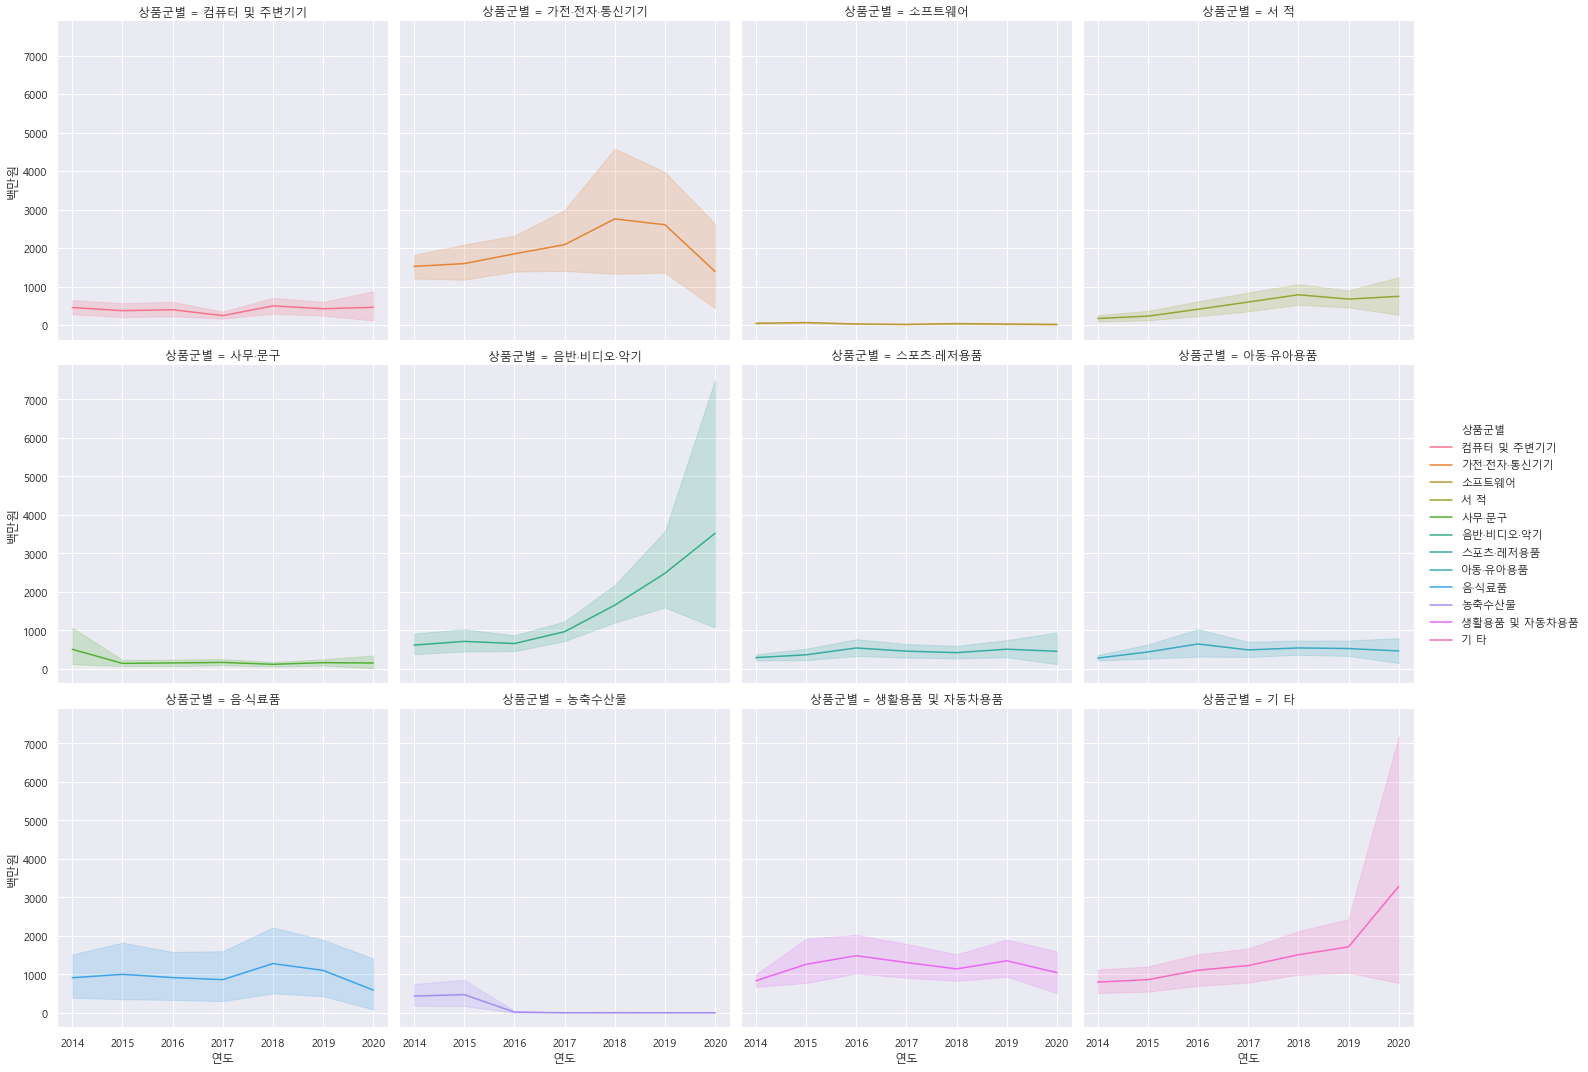

In [60]:
# 이방법말고 각 도메인의을 볼순 없을까?
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별", kind="line", col="상품군별",col_wrap=4 )

#  화장품 온라인 해외 직접 판매액 시각화


In [64]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1


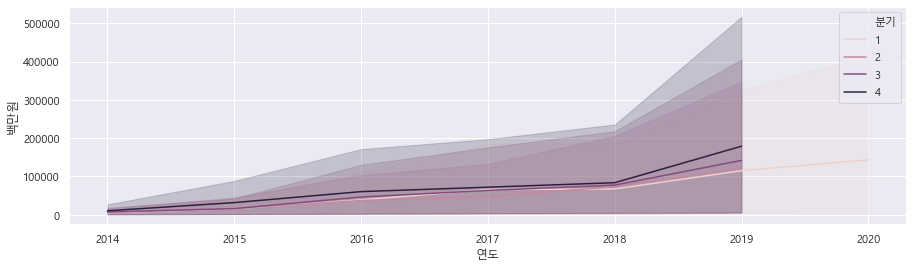

In [67]:
plt.figure(figsize=(15,4))
sns.lineplot(data = df_cosmetic,x="연도", y="백만원", hue="분기")

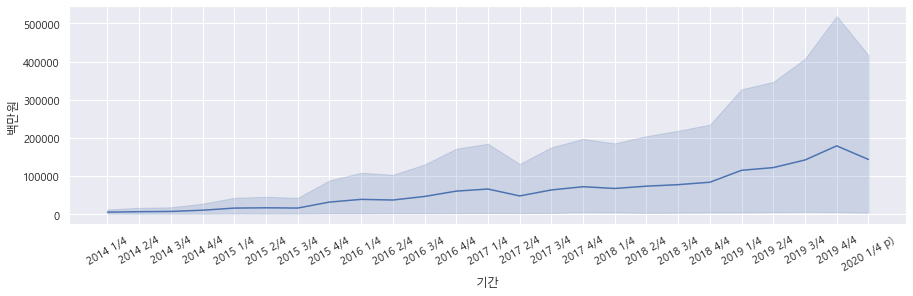

In [73]:
# 기간별,판매금액
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원")

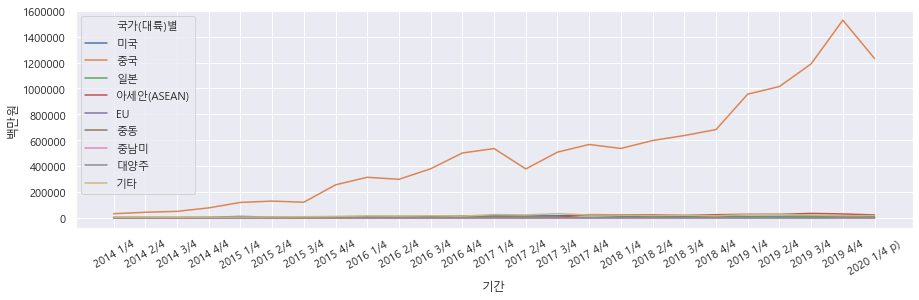

In [77]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원",hue="국가(대륙)별")

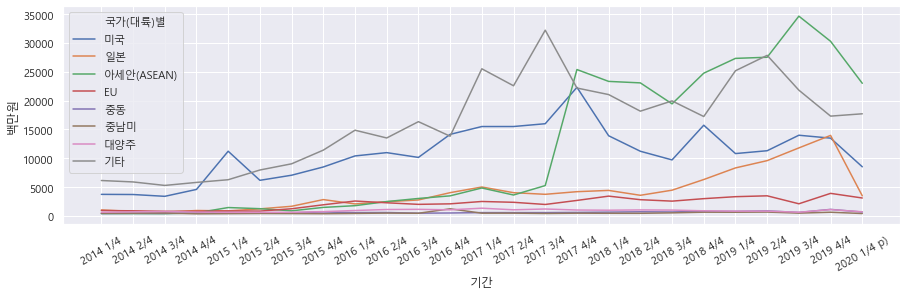

In [79]:
# 중국 제외해서 봅시다.
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"],x="기간",y="백만원",hue="국가(대륙)별")

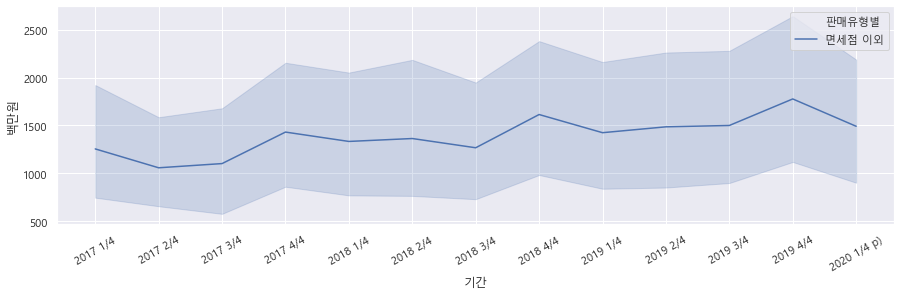

In [91]:
# 기간별  총 금액 데이터, 판매유형별로 다른 색상으로 표시하기
# 2016년까지는 na가 있어 lineplot을 그릴때 자동으로 제외 됩니다.
# 면세점이외의 값이 잘 보이지않아 면세점도 제외합니다.
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") &(df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub,x="기간", y="백만원", hue ="판매유형별")

# 패션 의류 온라인 해외 직접 판매액 시각화

In [97]:
# 의류 및 패션관련 상품과 판매유형별의 계 데이터만  가져오기
df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품" ) & (df["판매유형별"] == "계")].copy()
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
11046,EU,의류 및 패션관련 상품,계,2020 1/4 p),803.0,2020,1
11091,중동,의류 및 패션관련 상품,계,2020 1/4 p),258.0,2020,1
11136,중남미,의류 및 패션관련 상품,계,2020 1/4 p),113.0,2020,1
11181,대양주,의류 및 패션관련 상품,계,2020 1/4 p),461.0,2020,1


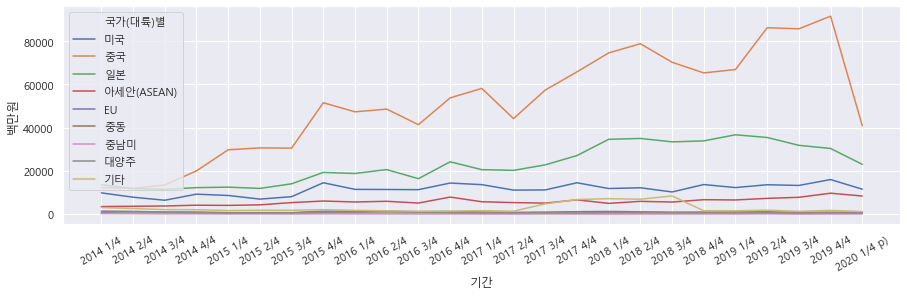

In [105]:
# 기간별 금액
# 국가대륙별로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간",y="백만원",hue="국가(대륙)별")

In [111]:
df_fashionExcSum = df[(df["상품군별"] == "의류 및 패션관련 상품" ) & (df["판매유형별"] != "계")].copy()


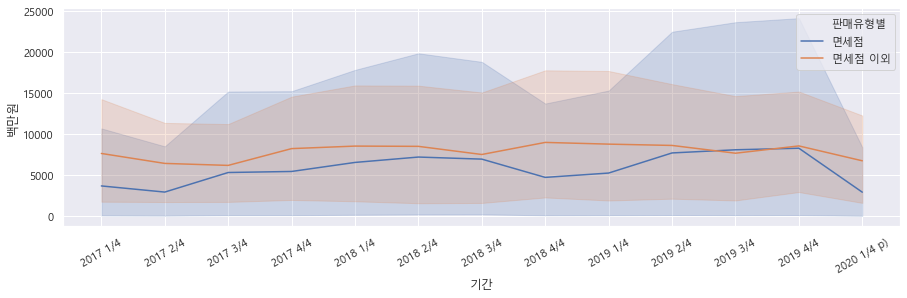

In [113]:
# 기간별 금액
# 판매유형별로 다른 색상으로 표현하기 면세점과 면세점이외로 나눠 보아ㅎ야함
# 
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashionExcSum, x="기간",y="백만원",hue="판매유형별")

# 데이터 pivot table로 집계하고 heatmap 으로 표현하기

In [125]:
# 피봇테이블로 "국가(대륙)별", "연도"별로 합계 금액을 표 형태로 구하기
# 연도리스트를 칼럼
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도" , values="백만원",aggfunc="sum").copy()

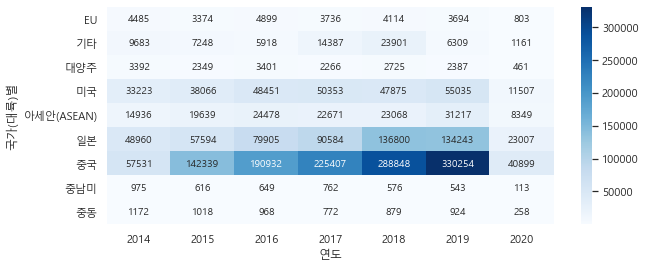

In [126]:
plt.figure(figsize=(10,4))
sns.heatmap(result,cmap='Blues',annot=True,fmt=".0f")

# 전체상품군별 시각화

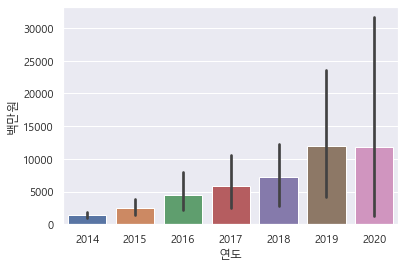

In [131]:
#위의 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기
sns.barplot(data=df_total,x="연도",y="백만원")


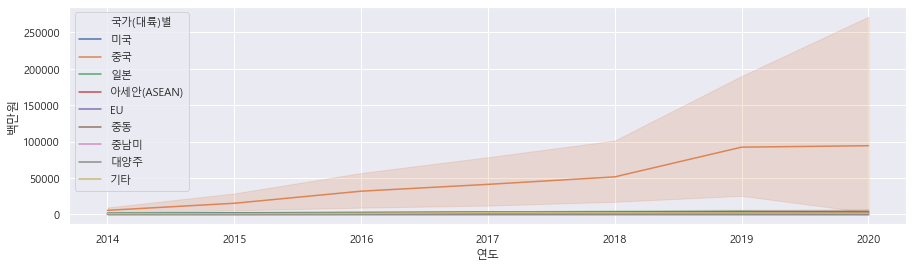

In [133]:
#연도별 판매액을 국가대륙별로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total,x="연도",y="백만원",hue="국가(대륙)별")

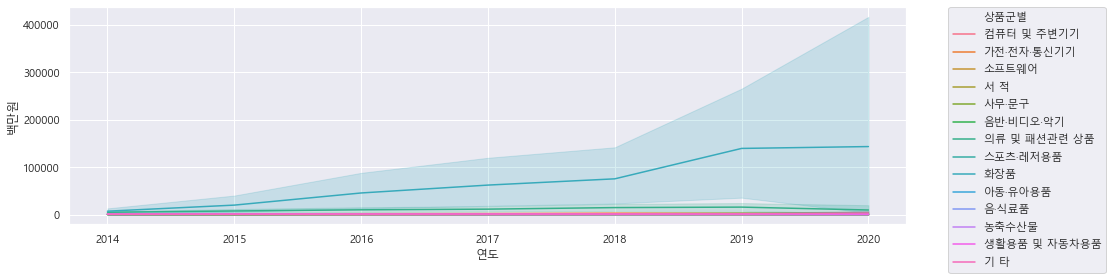

In [136]:
# 연도별 판매액을 그리고 상품군별 다른 색상으로 표현하기
#연도별 판매액을 국가대륙별로 다른 색상으로 표현하기

plt.figure(figsize=(15,4))
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor = (1.05,1) ,loc=2, borderaxespad=0.)

In [140]:
df_total.shape

(3150, 7)

In [142]:
# 인덱스별 정보확인
df_total.stack()

48     국가(대륙)별             미국
       상품군별        컴퓨터 및 주변기기
       판매유형별                계
       기간            2014 1/4
       백만원               2216
                     ...     
11247  판매유형별                계
       기간         2020 1/4 p)
       백만원                916
       연도                2020
       분기                   1
Length: 22050, dtype: object

In [139]:
df_total.melt()

,variable,value
0,국가(대륙)별,미국
1,국가(대륙)별,미국
2,국가(대륙)별,미국
3,국가(대륙)별,미국
4,국가(대륙)별,미국
...,...,...
22045,분기,1
22046,분기,1
22047,분기,1
22048,분기,1
